# Exercise 4.10
### 01. Import the libraries data sets into Jupyter
### 02. Consider any security implications that might exist for this new data
### 03. Create a regional segmentation of the data
### 04. Determine whether there’s a difference in spending habits between the different U.S. regions
### 05. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
### 06. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
### 07. Create an appropriate visualization to show the distribution of profiles
### 08. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### 09. Export

# 01. Import the libraries data sets into Jupyter

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Turn the project folder path into a string
path = r'/Users/fatemehshahvirdi/Work-Related/Data Analysis/Data Immersion/Achievement 4/Instacart Basket Analysis'

In [5]:
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# 02. Consider any security implications that might exist for this new data

In [6]:
# Check the column names
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency', 'first_name', 'family_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'marital_statues', 'income',
       '_merge'],
      dtype='object')

#### In the columns, we have 'first_name' and 'family_name', which are not necessary for the analysis and violate PII rules as they contain personal information. Therefore, I have decided to delete these columns for this reason.

In [7]:
# Dropping unnecessary columns
instacart.drop(columns = ['first_name', 'family_name'], inplace = True)

In [8]:
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_statues', 'income', '_merge'],
      dtype='object')

# 03. Create a regional segmentation of the data

In [9]:
# Regions are stored in the 'state' column and I want to locate the regions in differen areas based on the wiki link provided
instacart.loc[instacart['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']), 'region'] = 'Northeast' 

In [10]:
instacart.loc[instacart['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']), 'region'] = 'Midwest'

In [11]:
instacart.loc[instacart['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'region']= 'South'

In [12]:
instacart.loc[instacart['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']), 'region'] = 'West'

In [13]:
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_statues', 'income', '_merge', 'region'],
      dtype='object')

In [14]:
instacart['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

# 04. Determine whether there’s a difference in spending habits between the different U.S. regions

In [15]:
# Check the columns containing regions and spending flag
instacart[['region','spending_flag', 'order_frequency']].head()

,region,spending_flag,order_frequency
0,Midwest,Low spender,Frequent customer
1,Midwest,Low spender,Frequent customer
2,Midwest,Low spender,Frequent customer
3,Midwest,Low spender,Frequent customer
4,Midwest,Low spender,Frequent customer


In [16]:
spend_by_region = pd.crosstab(instacart['region'], instacart['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [17]:
spend_by_region

spending_flag,High spender,Low spender
region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


#### "The 'South' region exhibits the highest count in both 'High spender' and 'Low spender' groups, while the 'Northeast' region demonstrates the lowest count in both categories. For a more comprehensive analysis of customer spending habits, it's essential to normalize these numbers by considering factors such as spending per customer and the proportion of customers relative to the population of each state. This approach will provide deeper insights into the spending behaviors of each region."

In [18]:
price_region = pd.crosstab(instacart['region'], instacart['order_frequency'], dropna = False).sort_values(by = 'Frequent customer', ascending = False)

In [19]:
price_region

order_frequency,Frequent customer,Non-frequent customer,Regular customer,nan
region,,,,
South,7192372,1215088,2384420,5
West,5545206,927748,1819959,0
Midwest,5017709,863419,1716197,0
Northeast,3804566,630182,1287988,0


#### the result and conclusion are the same as above.

# 05. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [20]:
# Create exclusion flag
instacart.loc[instacart['max_order'] >= 5, 'exclusion_flag'] = 'high_activity customer'

In [21]:
instacart.loc[instacart['max_order'] < 5, 'exclusion_flag'] = 'low_activity customer'

In [22]:
#frequency check
instacart['exclusion_flag'].value_counts(dropna= False)

exclusion_flag
high_activity customer    30964564
low_activity customer      1440295
Name: count, dtype: int64

In [23]:
# Create the sample with high_activity customers
instacart_high_activity_customer = instacart[instacart['exclusion_flag']== 'high_activity customer']

In [24]:
# Create the sample with low_activity customers
instacart_low_activity_customer = instacart[instacart['exclusion_flag']== 'low_activity customer']

In [25]:
# check the subsets
len(instacart_high_activity_customer)+ len(instacart_low_activity_customer) == len(instacart)

True

In [26]:
# export
instacart_high_activity_customer.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_high_activity_customer'))

# 06. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [27]:
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_statues', 'income', '_merge', 'region',
       'exclusion_flag'],
      dtype='object')

In [28]:
instacart[['age', 'income', 'department_id' ,'n_dependants']].head()

,age,income,department_id,n_dependants
0,81,49620,19,1
1,81,49620,19,1
2,81,49620,12,1
3,81,49620,12,1
4,81,49620,10,1


## Profiling based on age

In [29]:
instacart['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [30]:
age_stats = pd.Series({
    'count': 3.240486e+07,
    'mean': 4.946527e+01,
    'std': 1.848558e+01,
    'min': 1.800000e+01,
    '25%': 3.300000e+01,
    '50%': 4.900000e+01,
    '75%': 6.500000e+01,
    'max': 8.100000e+01
})

# Define age ranges for each group
young_range = (age_stats['min'], age_stats['25%'])
adult_range = (age_stats['25%'], age_stats['50%'])
middle_aged_range = (age_stats['50%'], age_stats['75%'])
senior_range = (age_stats['75%'], age_stats['max'])

print("Young age range:", young_range)
print("Adult age range:", adult_range)
print("Middle-aged age range:", middle_aged_range)
print("Senior age range:", senior_range)

Young age range: (18.0, 33.0)
Adult age range: (33.0, 49.0)
Middle-aged age range: (49.0, 65.0)
Senior age range: (65.0, 81.0)


In [31]:
# Create categories for age based on the range in describe section
instacart.loc[instacart['age'] < 33, 'age_group'] = 'young_adult'
instacart.loc[(instacart['age'] >= 33) & (instacart['age'] < 49), 'age_group'] = 'adult'
instacart.loc[(instacart['age'] >= 49) & (instacart['age'] < 65), 'age_group'] = 'Middle_aged'
instacart.loc[instacart['age'] >= 65, 'age_group'] = 'Senior'

In [32]:
instacart['age_group'].value_counts(dropna=False)

age_group
Senior         8575084
adult          8116256
Middle_aged    8087706
young_adult    7625813
Name: count, dtype: int64

## Profiling based on income

In [33]:
instacart['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

#### our income range is from 25903 till 593901, with an avarega of 99437, lets check the possibility for outliers

In [34]:
# Provided statistics
count = 3.240486e+07
mean = 9.943773e+04
std = 4.305727e+04
min_value = 2.590300e+04
Q1 = 6.700400e+04
median = 9.661800e+04
Q3 = 1.279120e+05
max_value = 5.939010e+05

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check if there are any potential outliers
outliers = (min_value < lower_bound) or (max_value > upper_bound)

print("Lower bound for potential outliers:", lower_bound)
print("Upper bound for potential outliers:", upper_bound)
print("Potential outliers present:", outliers)

Lower bound for potential outliers: -24358.0
Upper bound for potential outliers: 219274.0
Potential outliers present: True


In [35]:
# Count outliers in the 'income' column
num_outliers = sum((value < lower_bound or value > upper_bound) for value in instacart['income'])

print("Number of outliers:", num_outliers)

Number of outliers: 229018


#### I should consult about removing the outliers or not, but it won't affect the profiling, so I'll continue with the procedure.

In [36]:
# calculating income categories
income_stats = pd.Series({
    'count': 3.240486e+07,
    'mean': 9.943773e+04,
    'std': 4.305727e+04,
    'min': 2.590300e+04,
    '25%': 6.700400e+04,
    '50%': 9.661800e+04,
    '75%': 1.279120e+05,
    'max': 5.939010e+05
})

# Calculate income ranges for each group
low_income_range = (income_stats['min'], income_stats['25%'])
average_income_range = (income_stats['25%'], income_stats['75%'])
high_income_range = (income_stats['75%'], income_stats['max'])

print("Low Income range:", low_income_range)
print("Average Income range:", average_income_range)
print("High Income range:", high_income_range)

Low Income range: (25903.0, 67004.0)
Average Income range: (67004.0, 127912.0)
High Income range: (127912.0, 593901.0)


In [37]:
# Create categories for income based on the range in describe section
instacart.loc[instacart['income'] < 67004, 'income_type'] = 'low_income'
instacart.loc[(instacart['income'] >= 67004) & (instacart['income'] < 127912), 'income_type'] = 'average_income'
instacart.loc[instacart['income'] >= 127912, 'income_type'] = 'high_income'

In [38]:
instacart['income_type'].value_counts(dropna=False)

income_type
average_income    16202357
high_income        8101288
low_income         8101214
Name: count, dtype: int64

## Profiling based on department_id

In [39]:
instacart[['department_id']].describe()

,department_id
count,32404859
unique,21
top,4
freq,9479291


In [40]:
#importing dataset departments
df_dep = pd.read_csv( os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [41]:
# Define Departments with a dictionary

department_dictionary = {
                            1: 'frozen',
                            2: 'other',
                            3: 'bakery',
                            4: 'produce',
                            5: 'alcohol',
                            6: 'international',
                            7: 'beverages',
                            8: 'pets',
                            9: 'dry goods pasta',
                            10: 'bulk',
                            11: 'personal care',
                            12: 'meat seafood',
                            13: 'pantry',
                            14: 'breakfast',
                            15: 'canned goods',
                            16: 'dairy eggs',
                            17: 'household',
                            18: 'babies',
                            19: 'snacks',
                            20: 'deli',
                                                    }

In [42]:
department_dictionary

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli'}

In [43]:
# Convert keys in department_dictionary to strings
department_dictionary = {str(key): value for key, value in department_dictionary.items()}

In [44]:
instacart['department_name'] = instacart['department_id'].map(department_dictionary).fillna("missing")

In [45]:
instacart[['department_id', 'department_name']].head()

,department_id,department_name
0,19,snacks
1,19,snacks
2,12,meat seafood
3,12,meat seafood
4,10,bulk


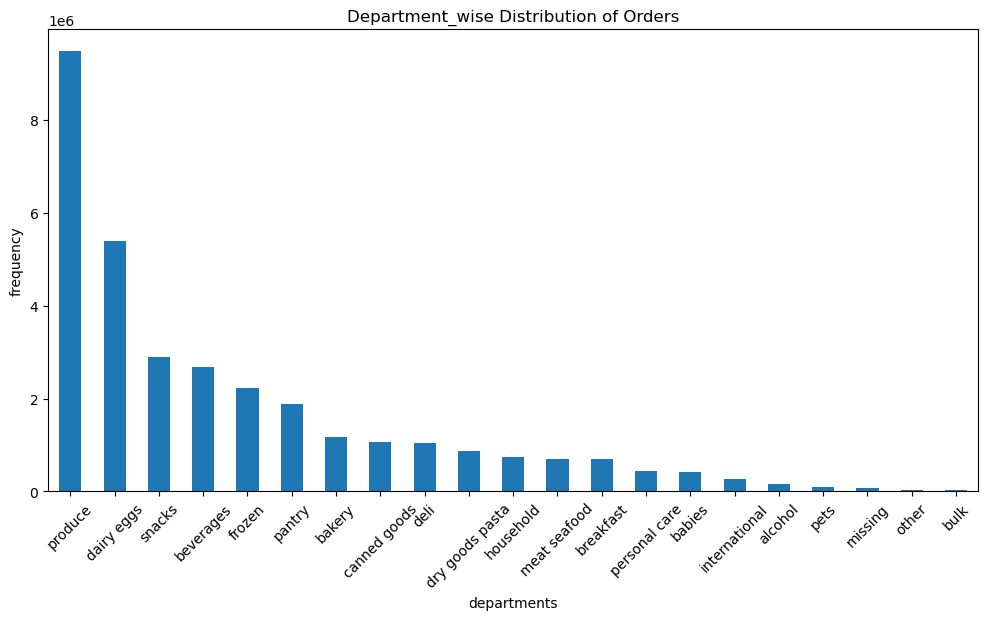

In [46]:
plt.figure(figsize = (12,6))
bar_Department_wise_Distribution_of_Orders= instacart['department_name'].value_counts().plot.bar()
plt.title('Department_wise Distribution of Orders')
plt.xlabel('departments')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()

In [47]:
bar_Department_wise_Distribution_of_Orders.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Department_wise_Distribution_of_Orders.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Departments in each region')

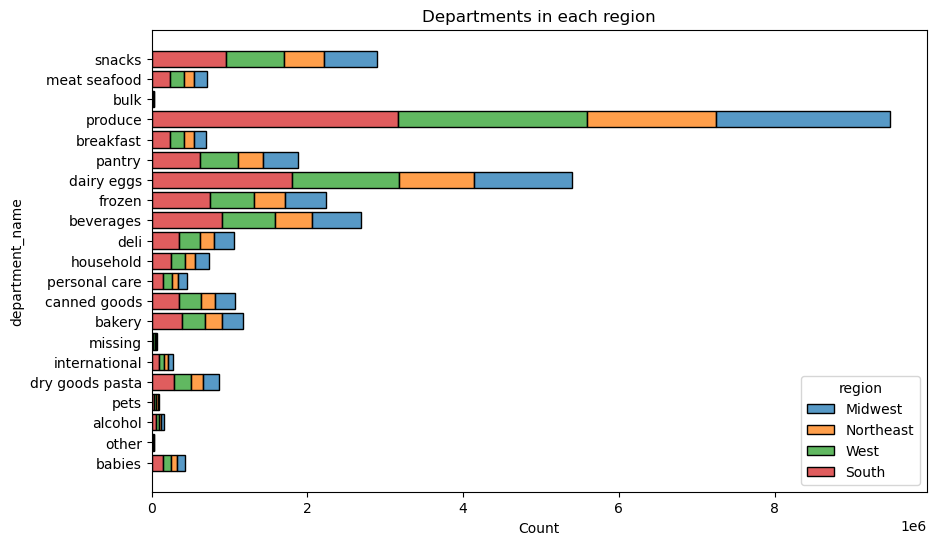

In [48]:
plt.figure(figsize=(10, 6))
hist_departments_region = sns.histplot(data = instacart, y = 'department_name',hue = 'region',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Departments in each region')

In [49]:
hist_departments_region.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_departments_region.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Relation between departments and spending groups')

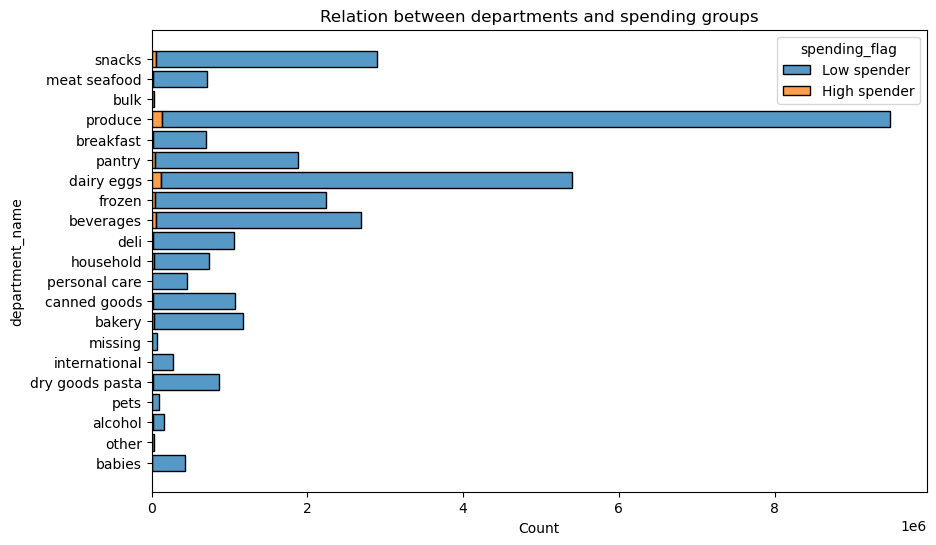

In [50]:
plt.figure(figsize=(10, 6))
hist_departments_spending = sns.histplot(data = instacart, y = 'department_name',hue = 'spending_flag',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Relation between departments and spending groups')

In [51]:
hist_departments_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_departments_spending.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Relation between departments and income range')

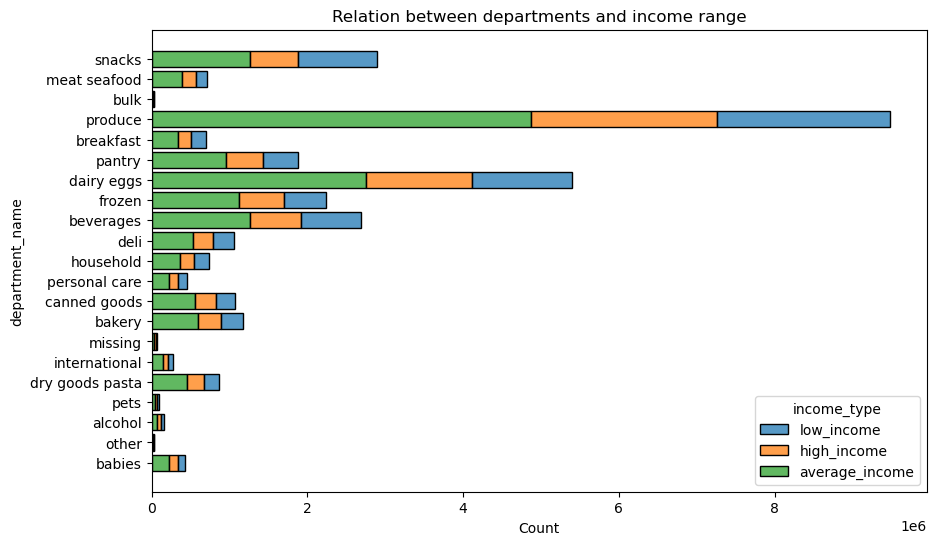

In [52]:
plt.figure(figsize=(10, 6))
hist_departments_income = sns.histplot(data = instacart, y = 'department_name',hue = 'income_type',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Relation between departments and income range')

In [53]:
hist_departments_income.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_departments_income.png'))

#### My grouping is:
#### As we see certain department has more sales, I want to categorise them in 3 groups based on their sale:
#### 1. High: 4.produce, 16.dairy eggs , 19.snacks, 7.beverages, 1.frozen
#### 2. Medium: 13. pantry, 3.bakery, 15.canned goods, 20.deli, 9.dry goods pasta. 17.houshold, 12.Meat seafood, 14.breakfast, 11.personal care , 18.babies
#### 3. Low: 6.international, 5.alcohol, 8.pets, 21.mising, 2.other, 10.bulk
#### I recommend delving deeper into the categories and enhancing the data in groups like 'missing', 'other', 'houshold'... to have more logical ways of grouping them

#### My grouping is:
#### As we see certain department has more sales, I want to categorise them in 3 groups based on their sale:
#### 1. High: 4.produce, 16.dairy eggs , 19.snacks, 7.beverages, 1.frozen
#### 2. Medium: 13. pantry, 3.bakery, 15.canned goods, 20.deli, 9.dry goods pasta. 17.houshold, 12.Meat seafood, 14.breakfast, 11.personal care , 18.babies
#### 3. Low: 6.international, 5.alcohol, 8.pets, 21.mising, 2.other, 10.bulk
#### I recommend delving deeper into the categories and enhancing the data in groups like 'missing', 'other', 'houshold'... to have more logical ways of grouping them

In [54]:
# Create categories for department_id 
instacart.loc[instacart['department_id'].isin(['4', '16', '19', '7', '1']), 'department_category'] = 'High'
instacart.loc[instacart['department_id'].isin(['13', '3', '15', '20', '9', '17', '12', '14', '11', '18']), 'department_category'] = 'Medium'
instacart.loc[instacart['department_id'].isin(['6', '5', '8', '21', '2', '10']), 'department_category'] = 'Low'

In [55]:
instacart['department_category'].value_counts(dropna= False)

department_category
High      22688454
Medium     9055731
Low         660674
Name: count, dtype: int64

## Profiling based on number of dependent

In [56]:
instacart[['n_dependants']].describe()

,n_dependants
count,3.240486e+07
mean,1.501896e+00
std,1.118865e+00
min,0.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,3.000000e+00


In [57]:
instacart.loc[instacart['n_dependants'] == 0, 'dependant_number'] = 'none'
instacart.loc[(instacart['n_dependants'] == 1) & (instacart['n_dependants'] == 2), 'dependant_number'] = 'average'
instacart.loc[instacart['n_dependants'] == 3, 'dependant_number'] = 'high'

In [58]:
instacart['dependant_number'].value_counts(dropna = False)

dependant_number
nan     16172247
high     8135109
none     8097503
Name: count, dtype: int64

# 07. Create an appropriate visualization to show the distribution of profiles

In [59]:
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_statues', 'income', '_merge', 'region',
       'exclusion_flag', 'age_group', 'income_type', 'department_name',
       'department_category', 'dependant_number'],
      dtype='object')

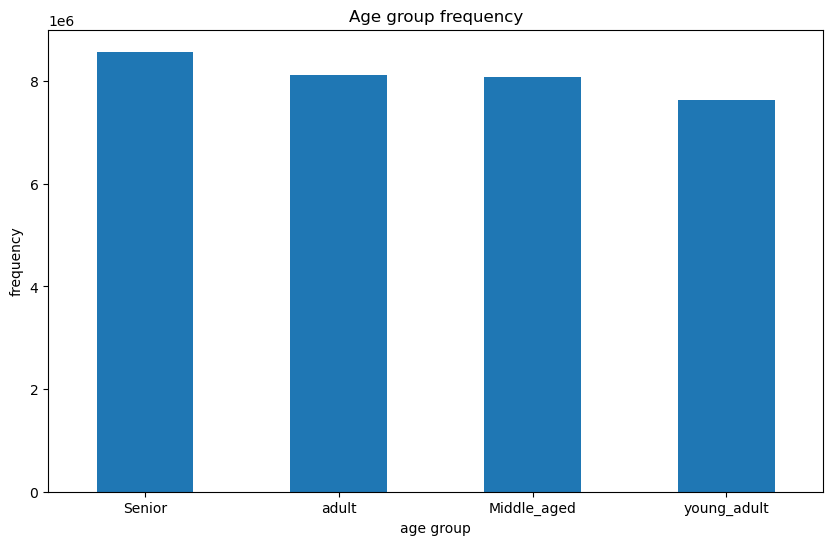

In [60]:
# Visualization of age groups frequency

plt.figure(figsize = (10,6))
bar_age_group = instacart['age_group'].value_counts().plot.bar()
plt.title('Age group frequency')
plt.xlabel('age group')
plt.ylabel('frequency')
plt.xticks(rotation=360)
plt.show()

#### My grouping is:
#### As we see certain department has more sales, I want to categorise them in 3 groups based on their sale:
#### 1. High: 4.produce, 16.dairy eggs , 19.snacks, 7.beverages, 1.frozen
#### 2. Medium: 13. pantry, 3.bakery, 15.canned goods, 20.deli, 9.dry goods pasta. 17.houshold, 12.Meat seafood, 14.breakfast, 11.personal care , 18.babies
#### 3. Low: 6.international, 5.alcohol, 8.pets, 21.mising, 2.other, 10.bulk
#### I recommend delving deeper into the categories and enhancing the data in groups like 'missing', 'other', 'houshold'... to have more logical ways of grouping them

In [61]:
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'age_group_frequency.png'))

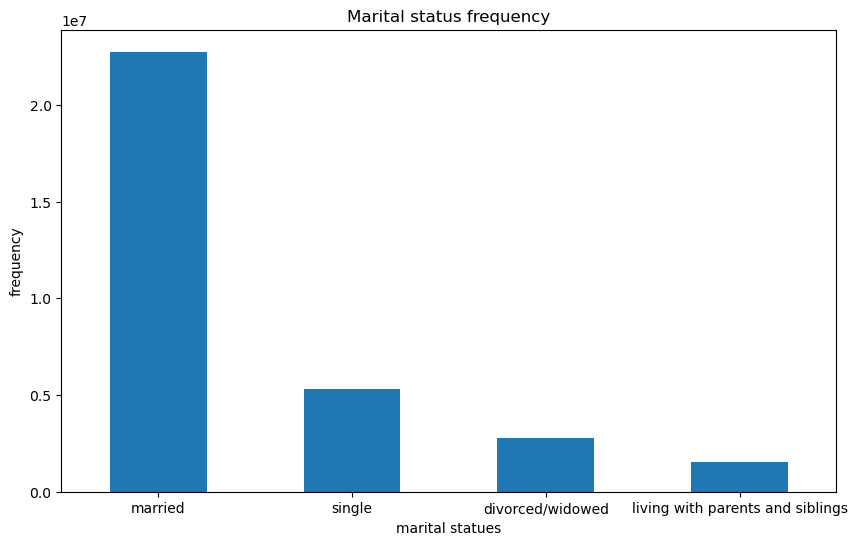

In [62]:
# Visualization of marital_statues frequency
plt.figure(figsize = (10,6))
marital_statues = instacart['marital_statues'].value_counts().plot.bar()
plt.title('Marital status frequency')
plt.xlabel('marital statues')
plt.ylabel('frequency')
plt.xticks(rotation=360)
plt.show()

In [64]:
marital_statues.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'marital_statues_frequency.png'))

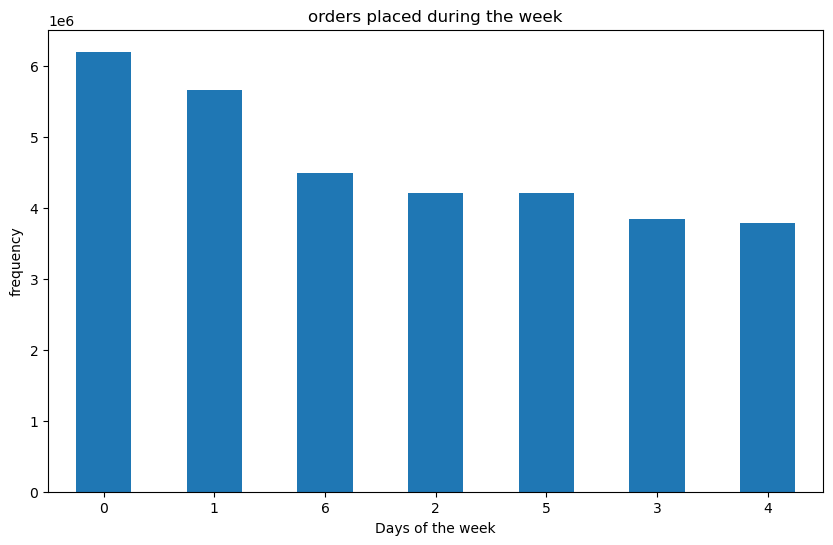

In [63]:
# Visualization of marital_statues frequency
plt.figure(figsize = (10,6))
days_of_the_week = instacart['orders_day_of_week'].value_counts().plot.bar()
plt.title('orders placed during the week')
plt.xlabel('Days of the week')
plt.ylabel('frequency')
plt.xticks(rotation=360)
plt.show()

In [88]:
days_of_the_week.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'orders placed during the week.png'))

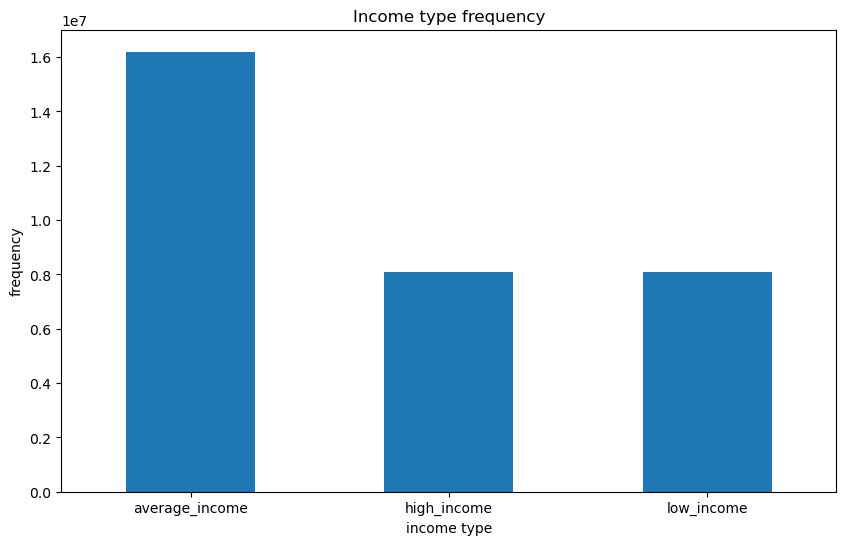

In [65]:
# Visualization of income_type frequency
plt.figure(figsize = (10,6))
bar_income_type = instacart['income_type'].value_counts().plot.bar()
plt.title('Income type frequency')
plt.xlabel('income type')
plt.ylabel('frequency')
plt.xticks(rotation=360)
plt.show()

In [66]:
bar_income_type.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Income_type_frequency.png'))

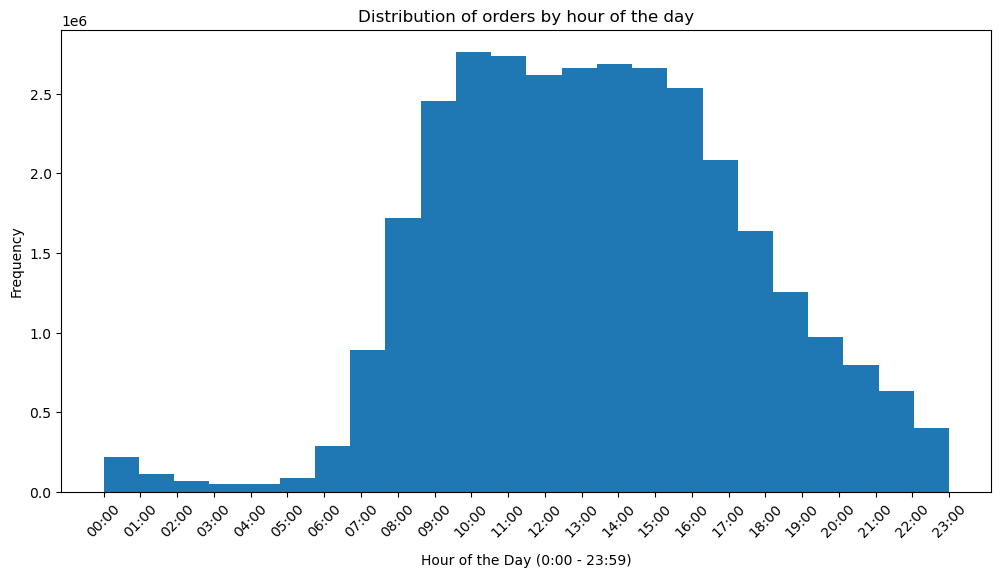

In [67]:
plt.figure(figsize = (12,6))
hist= instacart['order_hour_of_day'].plot.hist(bins = 24)
hist.set_title('Distribution of orders by hour of the day')
hist.set_xlabel("Hour of the Day (0:00 - 23:59)", labelpad=10)
hours = np.arange(0, 24)
hist.set_xticks(hours)
hist.set_xticklabels([f'{hour:02}:00' for hour in hours])
plt.xticks(rotation=45)
plt.show()

In [68]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Distribution of orders by hour of the day.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


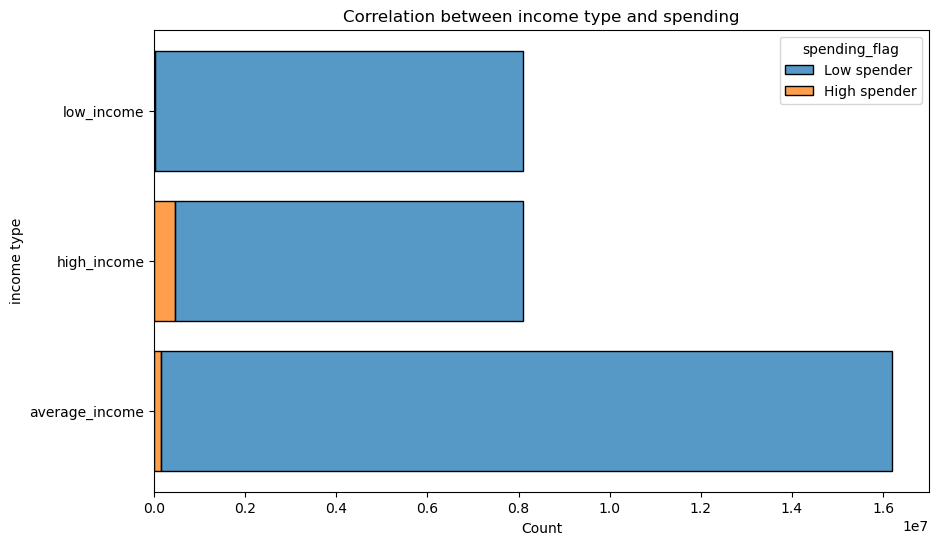

In [69]:
plt.figure(figsize = (10,6))
hist_income_type_and_spending = sns.histplot(data = instacart, y = 'income_type',hue = 'spending_flag',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Correlation between income type and spending')
plt.ylabel('income type')
plt.show()

In [70]:
hist_income_type_and_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_income_type_and_spending.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Income type by marital statues')

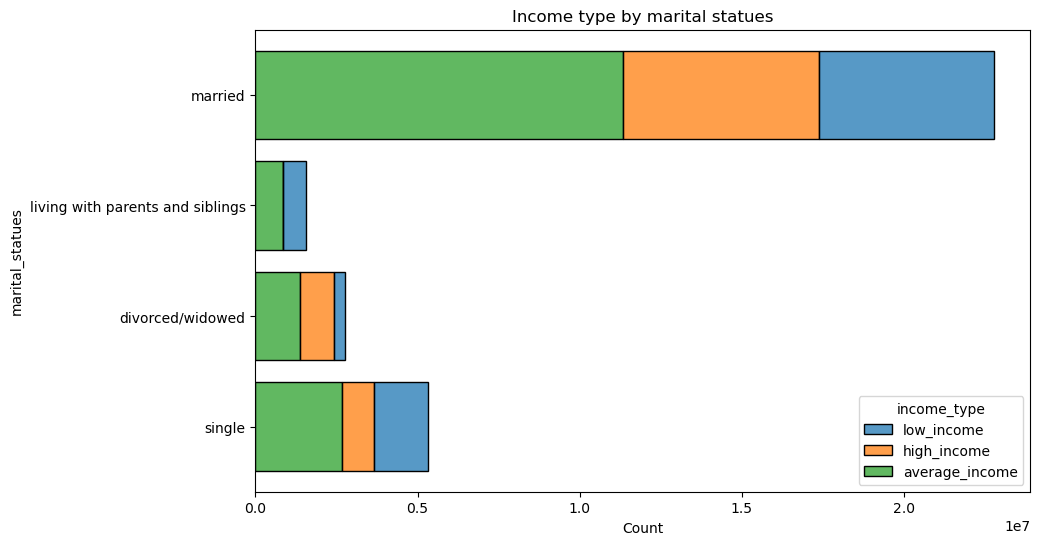

In [71]:
plt.figure(figsize=(10, 6))
hist_marital_statues_income_type = sns.histplot(data = instacart, y = 'marital_statues',hue = 'income_type',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Income type by marital statues')

In [72]:
hist_marital_statues_income_type.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_marital_statues_income_type.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


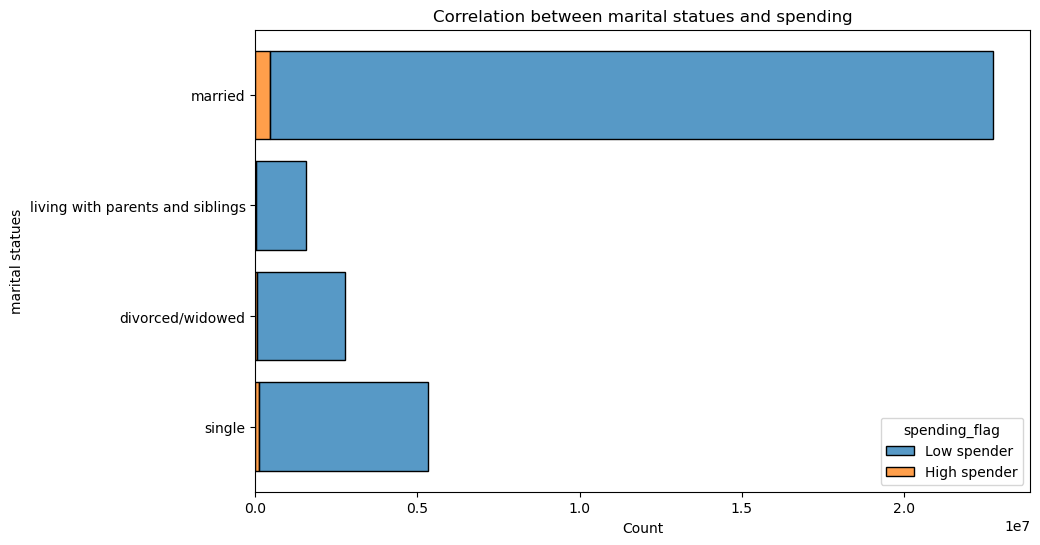

In [73]:
plt.figure(figsize = (10,6))
hist_marital_statues_and_spending = sns.histplot(data = instacart, y = 'marital_statues',hue = 'spending_flag',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Correlation between marital statues and spending')
plt.ylabel('marital statues')
plt.show()

In [74]:
hist_marital_statues_and_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_marital_statues_and_spending.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


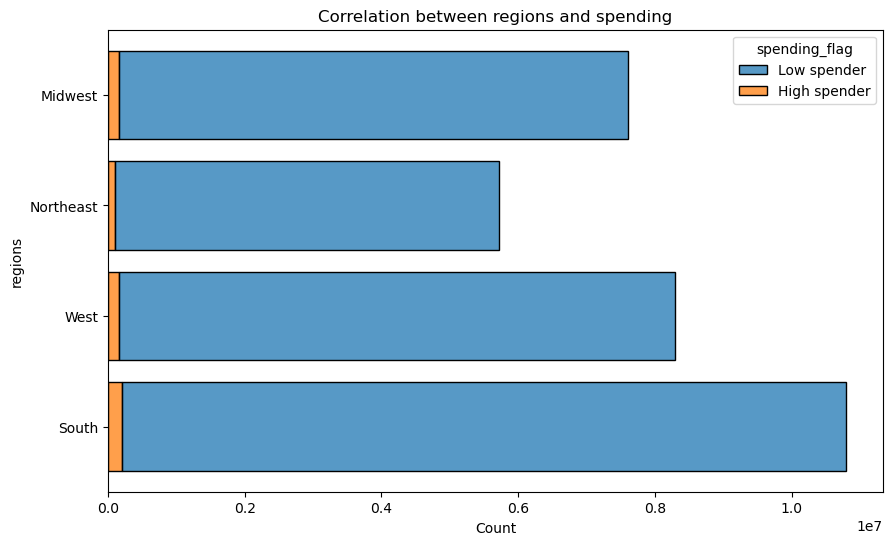

In [75]:
plt.figure(figsize = (10,6))
hist_region_and_spending = sns.histplot(data = instacart, y = 'region',hue = 'spending_flag',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Correlation between regions and spending')
plt.ylabel('regions')
plt.show()

In [76]:
hist_region_and_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_region_and_spending.png'))

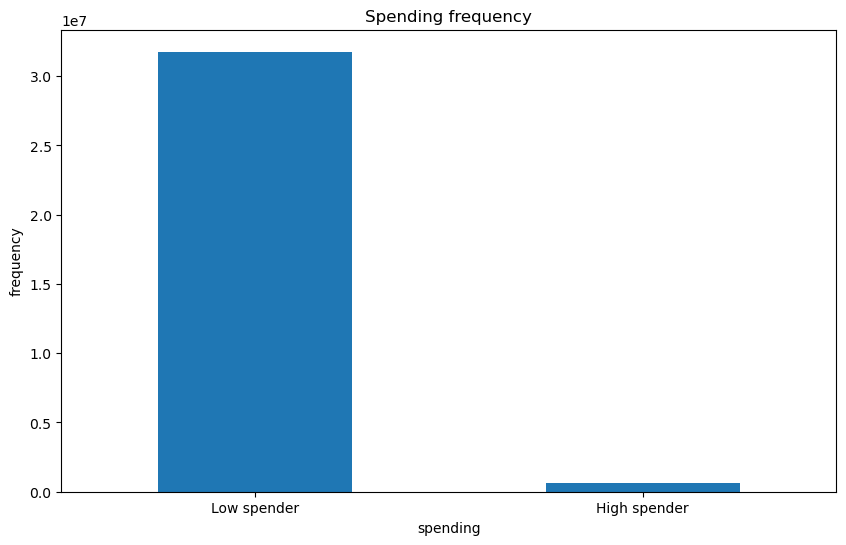

In [77]:
plt.figure(figsize = (10,6))
spending = instacart['spending_flag'].value_counts().plot.bar()
plt.title('Spending frequency')
plt.xlabel('spending')
plt.ylabel('frequency')
plt.xticks(rotation=360)
plt.show()

In [78]:
spending.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_spending_frequency.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


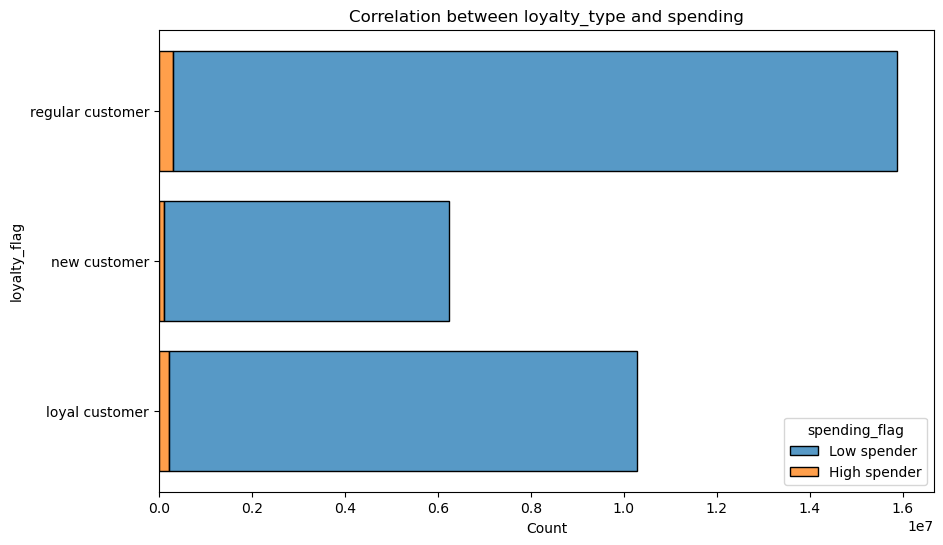

In [79]:
plt.figure(figsize = (10,6))
hist_Loyalty_and_spending = sns.histplot(data = instacart, y = 'loyalty_flag',hue = 'spending_flag',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Correlation between loyalty_type and spending')
plt.ylabel('loyalty_flag')
plt.show()

In [80]:
hist_Loyalty_and_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_Loyalty_and_spending.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


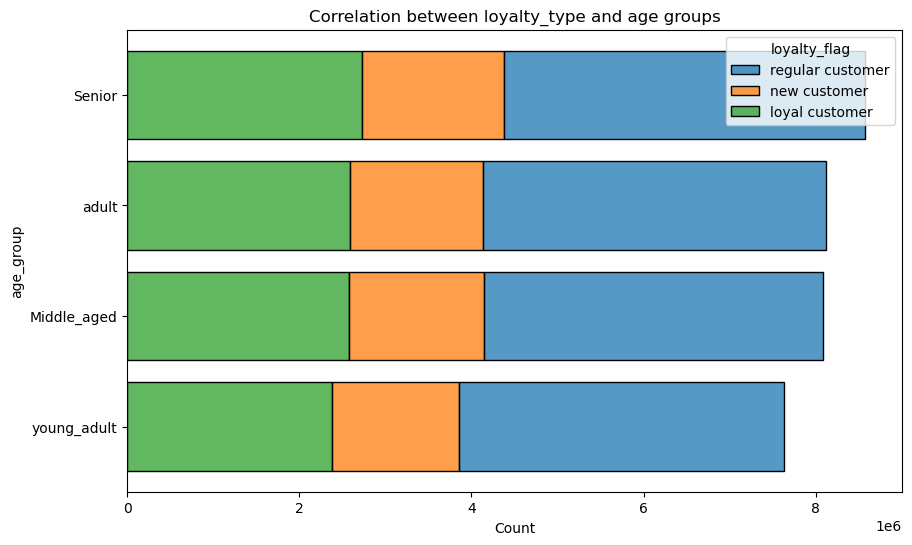

In [81]:
plt.figure(figsize = (10,6))
hist_Loyalty_and_age = sns.histplot(data = instacart, y = 'age_group',hue = 'loyalty_flag',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Correlation between loyalty_type and age groups')
plt.ylabel('age_group')
plt.show()

In [82]:
hist_Loyalty_and_age.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_Loyalty_and_age.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


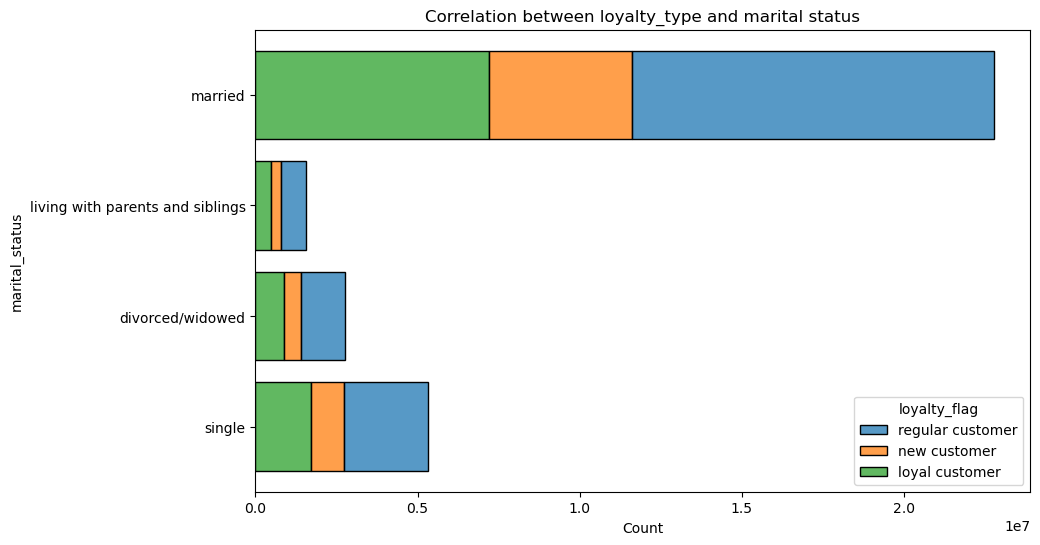

In [83]:
plt.figure(figsize = (10,6))
hist_Loyalty_and_marital_statues = sns.histplot(data = instacart, y = 'marital_statues',hue = 'loyalty_flag',multiple = 'stack', shrink=.8, pthresh = 6)
plt.title('Correlation between loyalty_type and marital status')
plt.ylabel('marital_status')
plt.show()

In [84]:
hist_Loyalty_and_marital_statues.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_Loyalty_and_marital_statues.png'))

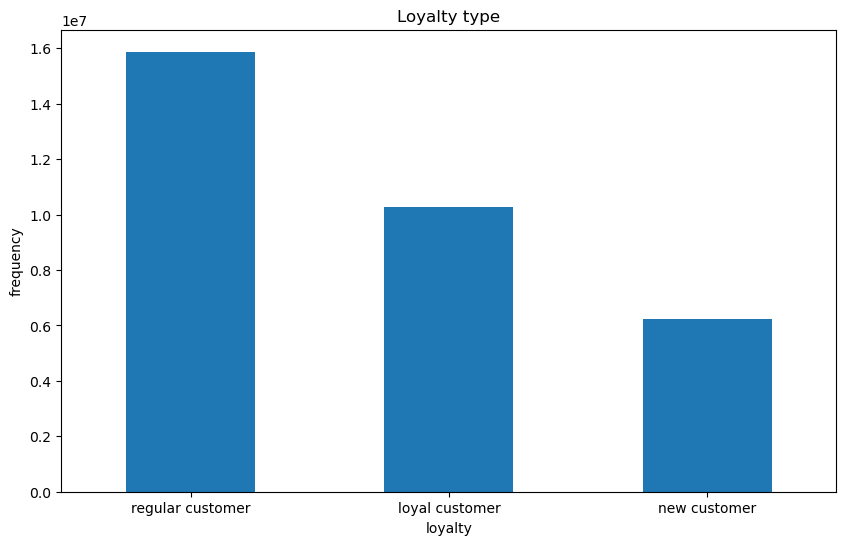

In [89]:
plt.figure(figsize = (10,6))
loyatly_type = instacart['loyalty_flag'].value_counts().plot.bar()
plt.title('Loyalty type')
plt.xlabel('loyalty')
plt.ylabel('frequency')
plt.xticks(rotation=360)
plt.show()

In [86]:
loyatly_type.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'loyatly_type_frequency.png'))

NameError: name 'loyatly_type' is not defined

pivot_table = pd.crosstab(instacart['income_type'], instacart['age_group'])

plt.figure(figsize=(10, 8))

sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='g', cbar=True, linewidths=0.5, linecolor='black', square=True)

plt.title("Relationship Between Income Range and Age Range")
plt.xlabel("Age Range")
plt.ylabel("Income Range")
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'heat_map 2.png'))
plt.show()

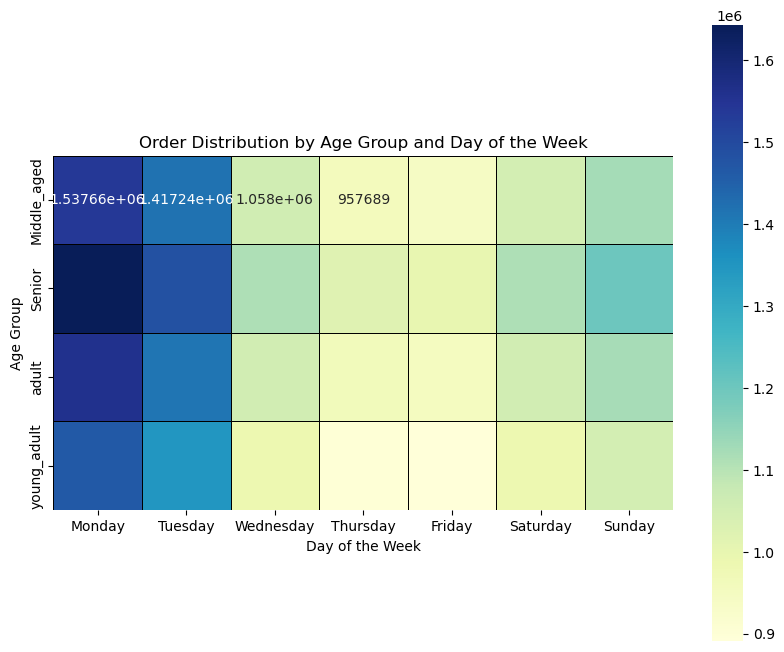

In [90]:
plt.figure(figsize=(10, 8))
pivot_table = instacart.pivot_table(index='age_group', columns='orders_day_of_week', values='order_id', aggfunc='count')
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='g', cbar=True, linewidths=0.5, linecolor='black', square=True, xticklabels=day_order)
plt.title("Order Distribution by Age Group and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Age Group")

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'heat_map 2.png'))

plt.show()

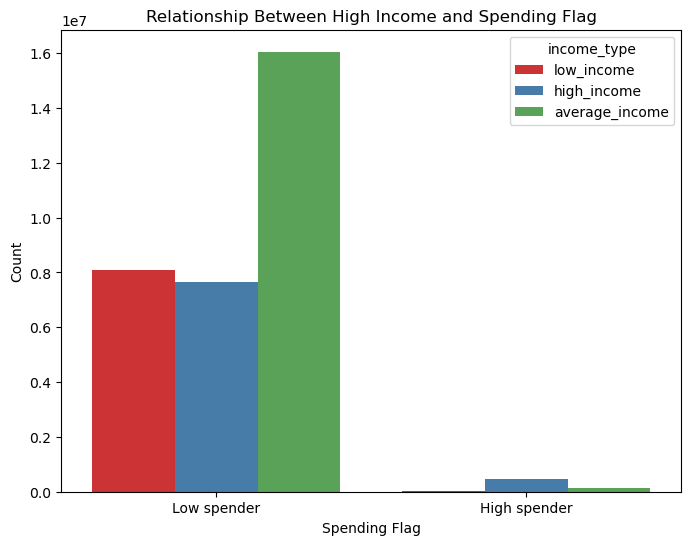

In [91]:
plt.figure(figsize=(8, 6))
sns.countplot(data=instacart, x='spending_flag', hue='income_type', palette='Set1')

plt.title("Relationship Between High Income and Spending Flag")
plt.xlabel("Spending Flag")
plt.ylabel("Count")

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Relationship Between High Income and Spending Flag.png'))
plt.show()

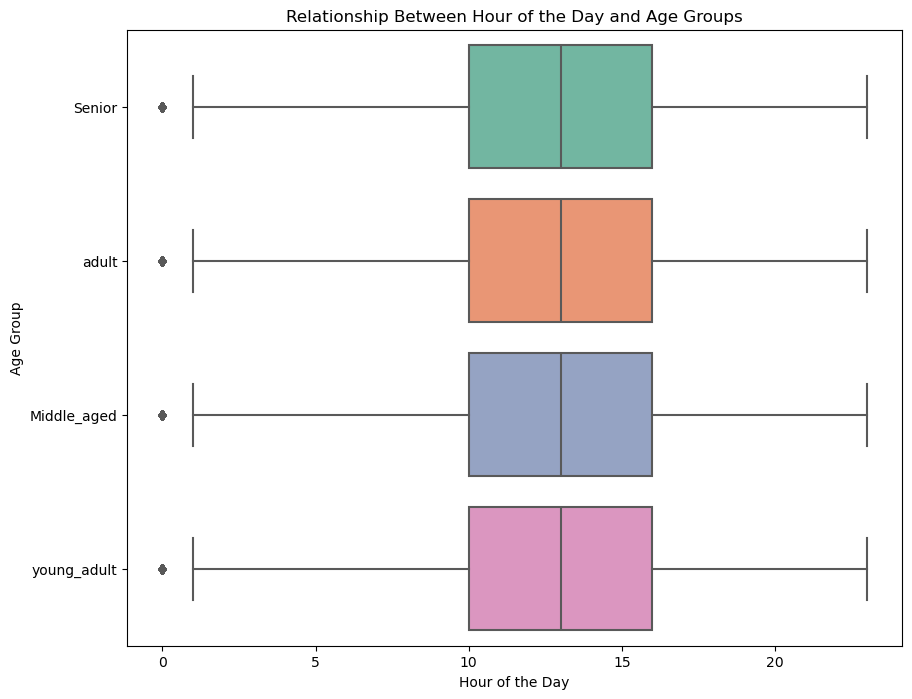

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.boxplot(data=instacart, x='order_hour_of_day', y='age_group', palette='Set2')

plt.title("Relationship Between Hour of the Day and Age Groups")
plt.xlabel("Hour of the Day")
plt.ylabel("Age Group")

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Relationship Between Hour of the Day and Age Groups.png'))
plt.show()

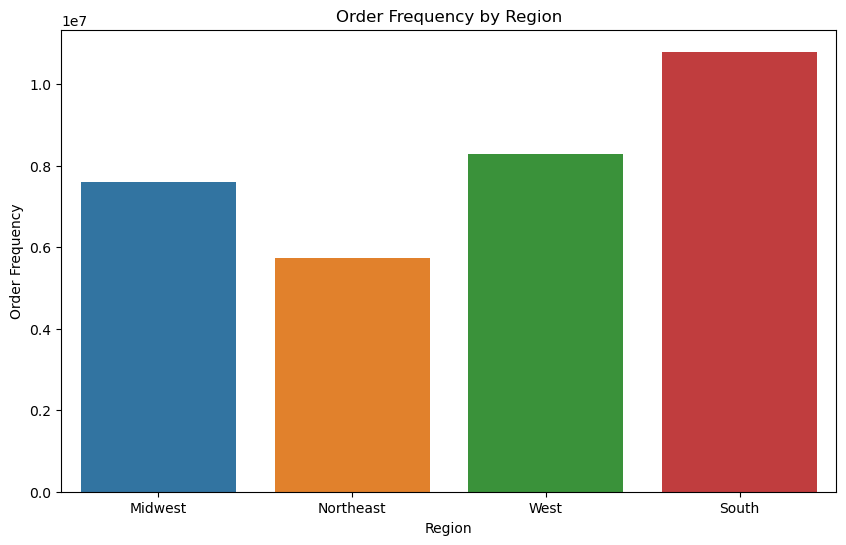

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(data=instacart, x='region')
plt.title("Order Frequency by Region")
plt.xlabel("Region")
plt.ylabel("Order Frequency")
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Order Frequency by Region.png'))
plt.show()

# 08. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

# done in the previous steps

# 09. Export

In [ ]:
instacart.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_finaldata'))


In [ ]:
instacart.columns